In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

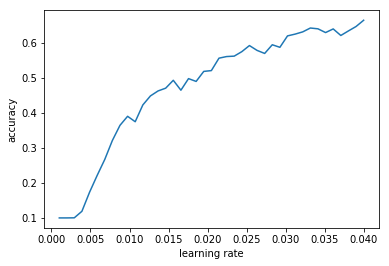

In [7]:
RESULT_DIR = '../results/headline'
result = pd.read_csv(f'{RESULT_DIR}/lrrt.csv')
df = result[['val_acc', 'lr']]
df.columns = ['accuracy', 'learning rate']
ax = sns.lineplot(x='learning rate', y='accuracy', data=df)